In [8]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

/opt/homebrew/anaconda3/envs/pyml/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/homebrew/anaconda3/envs/pyml/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


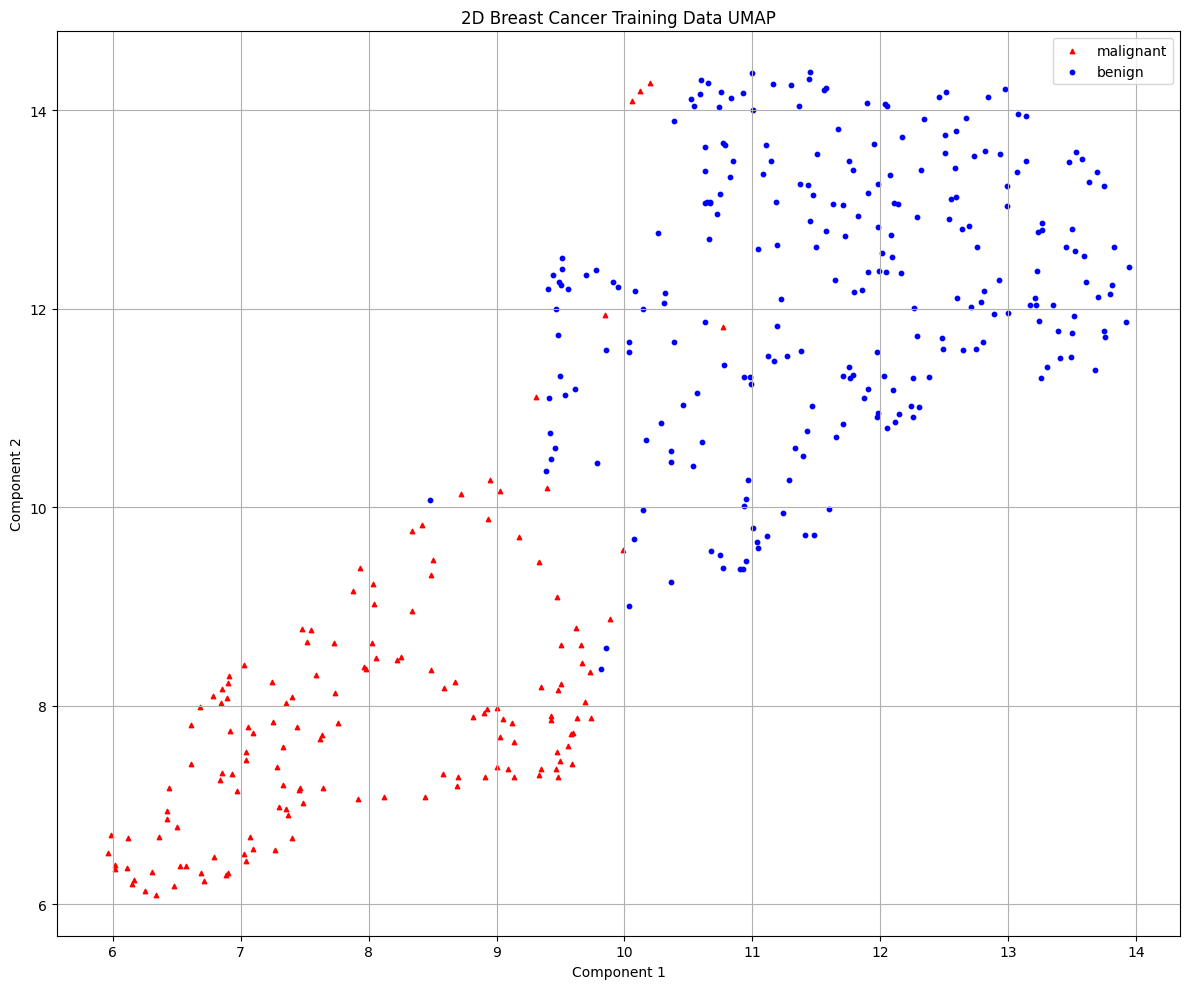

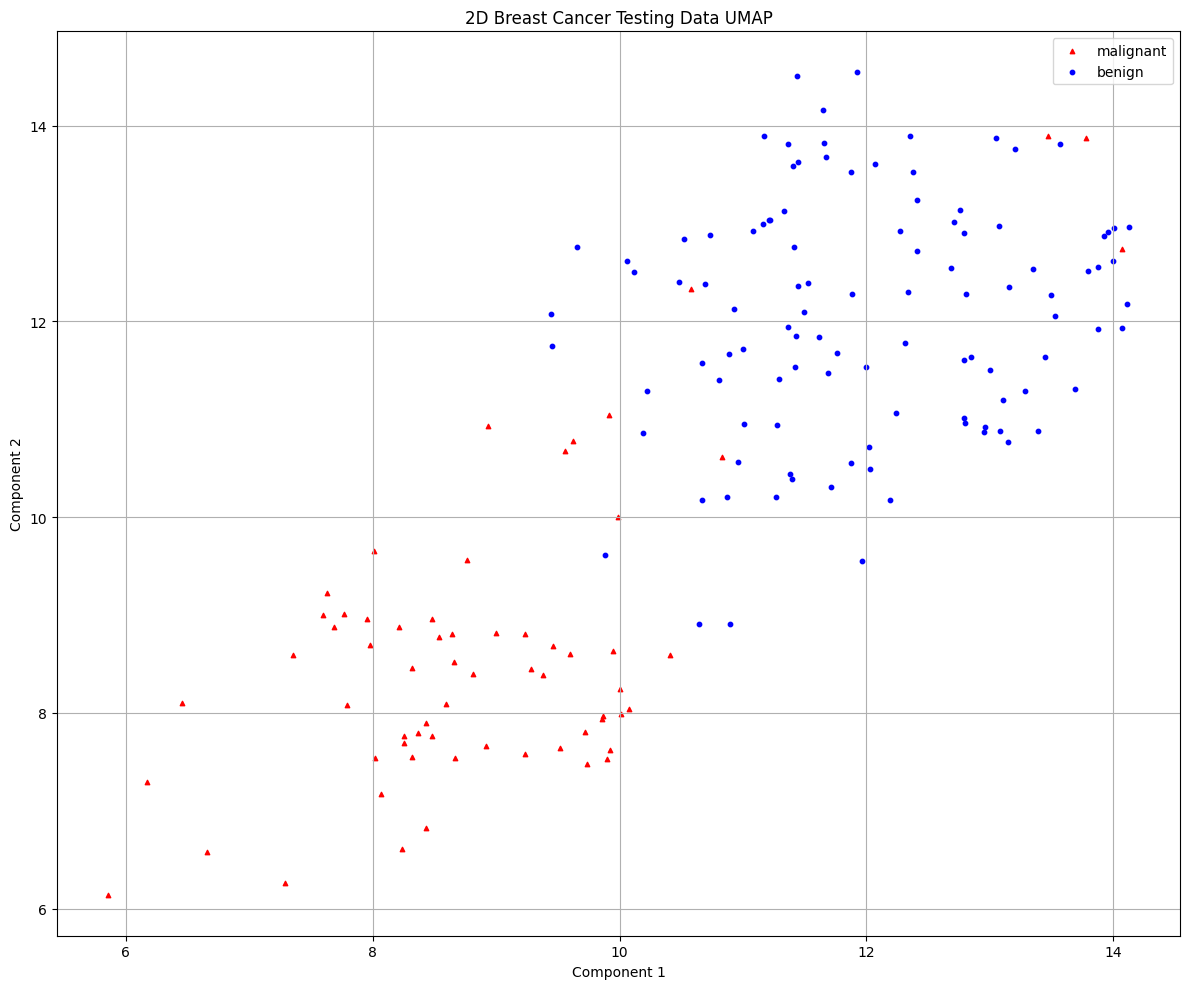

In [9]:
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')
X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(X_train_scaled, X_test_scaled, y_train, y_test, 'umap', {})

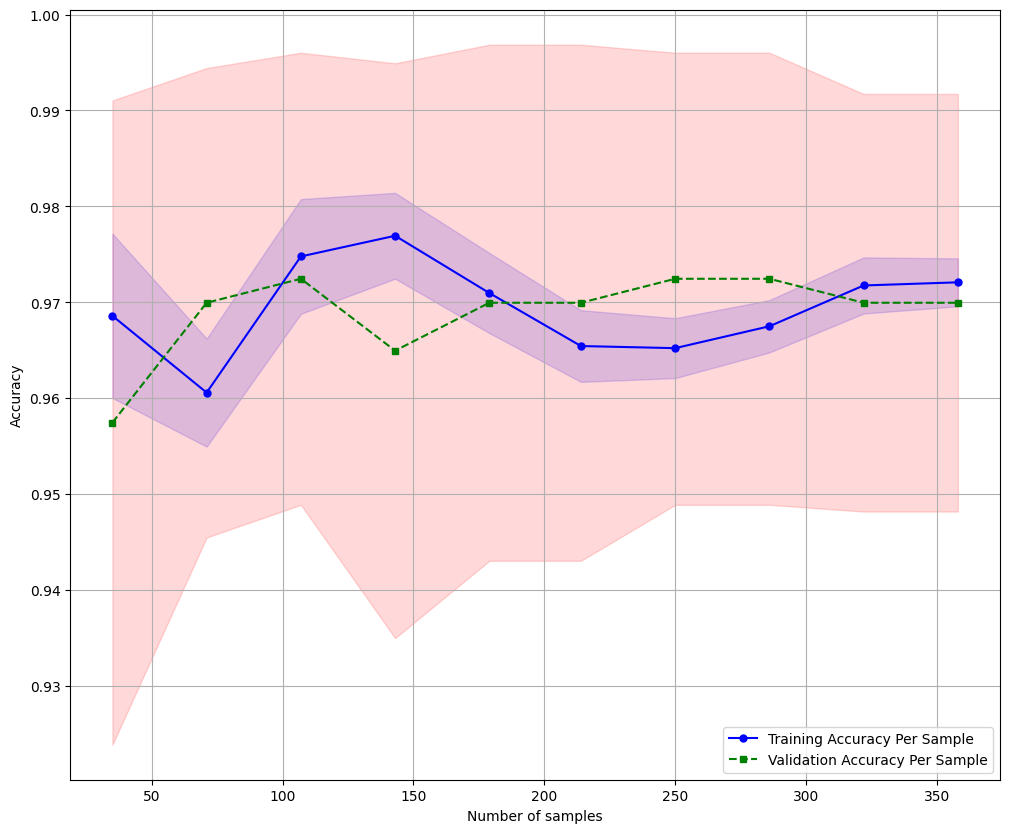

Confusion Matrix
[[ 54  10]
 [  0 107]]
Accuracy: 0.9415, Precision: 0.9145, Recall: 1.0000, F1: 0.9554, AUC: 0.9483


In [11]:
params = {'C': 0.18772579085890623, 'kernel': 'linear', 'max_iter': 2837}
helper.train_and_evaluate_bagging_ensemble_model_with_optimized_model('svc', params, X_train_feature_extracted, X_test_feature_extracted, y_train, y_test)

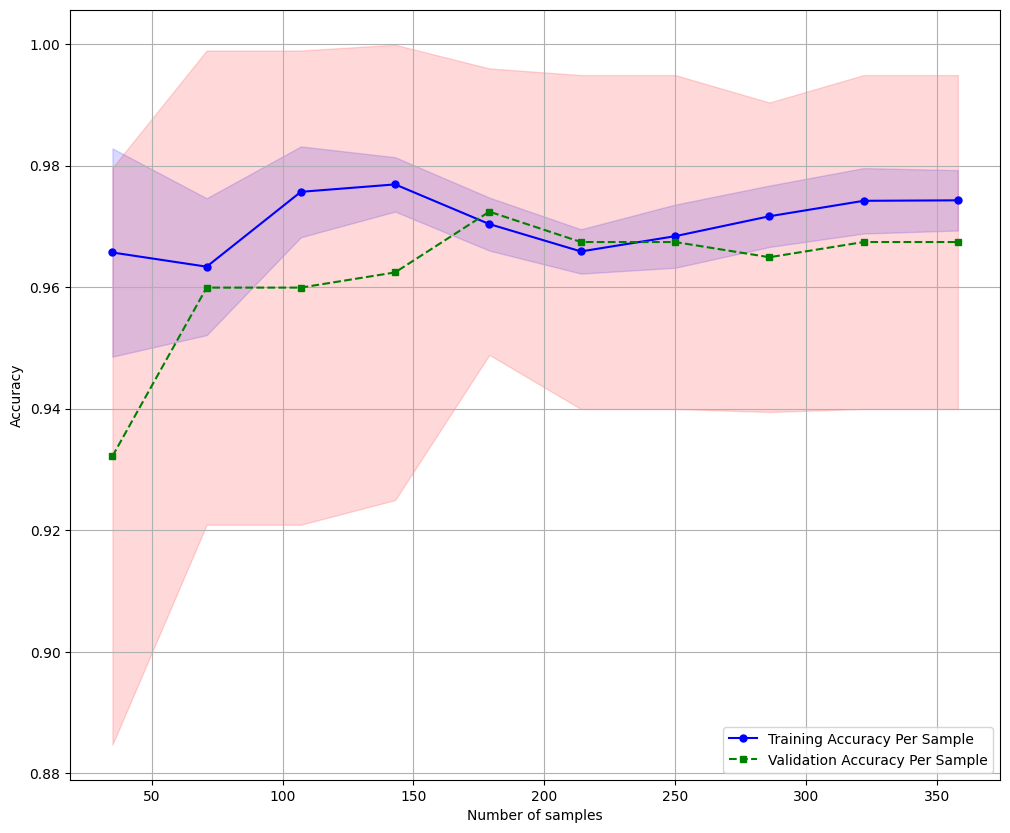

Confusion Matrix
[[ 52  12]
 [  0 107]]
Accuracy: 0.9298, Precision: 0.8992, Recall: 1.0000, F1: 0.9469, AUC: 0.9524


In [12]:
params = {'n_estimators': 730, 'max_depth': 30, 'min_samples_split': 16, 'min_samples_leaf': 1}
helper.train_and_evaluate_bagging_ensemble_model_with_optimized_model('rf', params, X_train_feature_extracted, X_test_feature_extracted, y_train, y_test)